# Метрические классификаторы

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Вспомним теорию

Обучающая выборка:
$$
    X^l = (x_i, y_i)_{i=1}^{l}    
$$

Функция расстояния:
$$
    \rho: X \times X \to \mathbb{R}^+
$$

Метрический алгоритм классификации:
$$
    a(x, X^l) = \arg \max_{y \in Y} \sum_{i = 1}^{l}[y_i = y] ~ w(i, x)
$$

где $w(i, x)$ - вес (степень важности) i-ого соседа объекта $x$. Обычно $w(i, x)$ обратно пропорционален расстоянию от i-ого соседа до объекта x. Для метода ближайших соседей $w(i,x)=1$.

![](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

Обозначим сумму под $\arg \max$ за $\Gamma_y(x):$

$$
    a(x, X^l) = \arg \max_{y \in Y} \sum_{i = 1}^{l}[y_i = y] ~ w(i, x) = \arg \max_{y \in Y} \Gamma_y(x)
$$

$\Gamma_y(x) - $ оценка близости объекта x к классу y.

### Генерация данных

Сгенерируем данные

In [2]:
np.random.seed(13)
n = 100
a = np.random.normal(loc=0, scale=1, size=(n, 2))
b = np.random.normal(loc=3, scale=2, size=(n, 2))

Визуализируем полученный набор данных

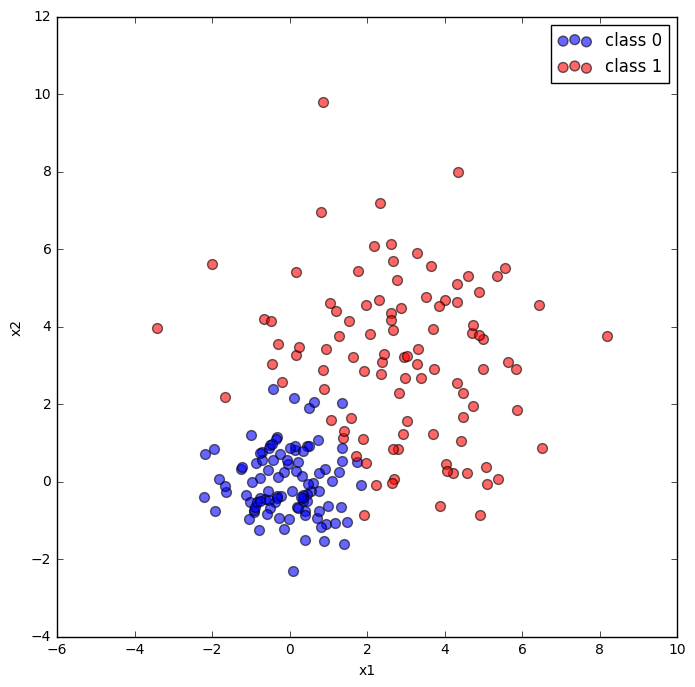

In [3]:
plt.figure(figsize=(8, 8))

plt.scatter(a[:, 0], a[:, 1], c='blue', s=50, alpha=0.6)
plt.scatter(b[:, 0], b[:, 1], c='red', s=50, alpha=0.6)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['class 0', 'class 1'], loc='upper right')

Объединим матрицы в единую матрицу данных и создадим отдельный столбец меток класса

In [4]:
X = np.vstack([a, b])
y = np.hstack([np.zeros(n), np.ones(n)])

print X.shape, y.shape

(200L, 2L) (200L,)


Можно визуализировать одной командой scatter

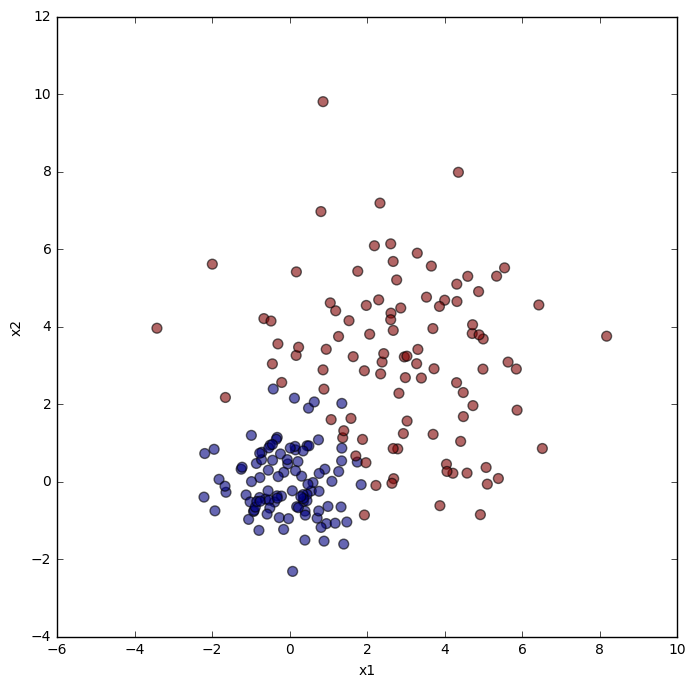

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.6)
plt.xlabel('x1')
plt.ylabel('x2')

## Обучение моделей

Попробуем обучить разные варианты [метода ближайших соседей](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) из scikit-learn:

sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)

Для начала обучим метод 3 ближайших соседей

In [6]:
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(n_neighbors=3)
clf.fit(X, y)
print clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


Предскажем метки для каких-нибудь точек

In [7]:
pred = clf.predict([
             [2, 0],
             [10, 20],
             [-10, -20]
            ])
pred

array([ 1.,  1.,  0.])

Предскажем вероятности каждой из меток

In [8]:
clf.predict_proba([
                   [2, 0],
                   [10, 20],
                   [-10, -20]
                   ])

array([[ 0.33333333,  0.66666667],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ]])

Визуализируем три новые точки

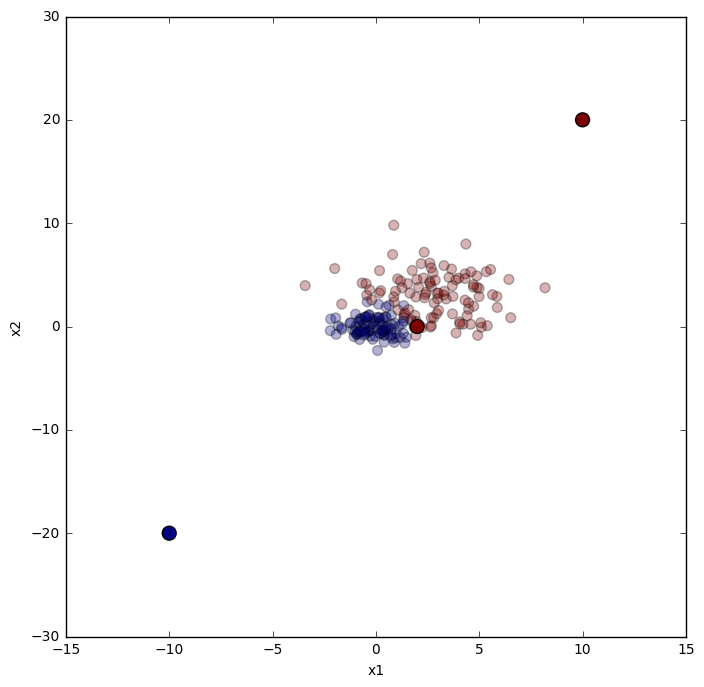

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.3)
plt.scatter([2,10,-10],[0,20,-20], c=pred, s = 100)
plt.xlabel('x1')
plt.ylabel('x2')

А что, если мы хотим помотреть как обученный алгоритм проводит разделяющую поверхность между объектами из признакового пространства?

Для начала напишем функцию для генерации карты точек

In [10]:
def get_grid(data, border=1., step=.01):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                       np.arange(y_min, y_max, step))

Примерним классификатор к карте точек и визуализируем её

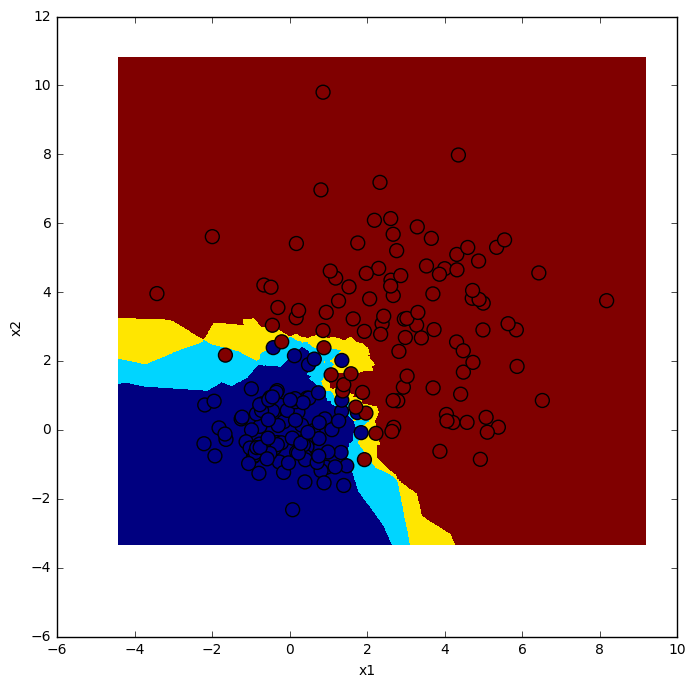

In [11]:
plt.figure(figsize=(8, 8))
xx, yy = get_grid(X)
predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel('x1')
plt.ylabel('x2')

Немного побалуемся с параметрами визуализации

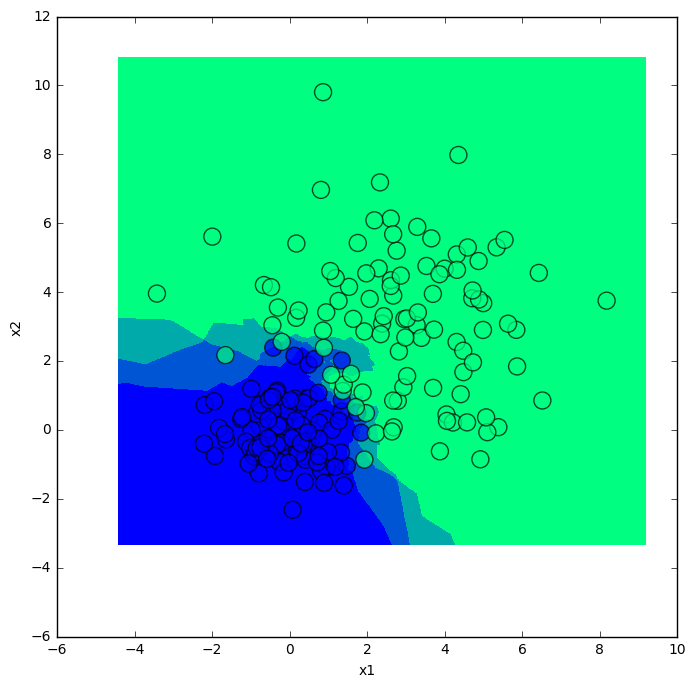

In [12]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='winter')
plt.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='winter', alpha=0.7)
plt.xlabel('x1')
plt.ylabel('x2')

Обернём все вышеописанное (обучение + предсказание + визуализацию) в одну функцию

In [13]:
def plot_model(X, y, clf):
    clf.fit(X, y)
    xx, yy = get_grid(X)
    predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    plt.axis('equal')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='winter', alpha=0.7)

Будем перебирать параметр число соседей и визуализировать полученное разбиение пространства объектов

1 2 3 4 5 6 7 8


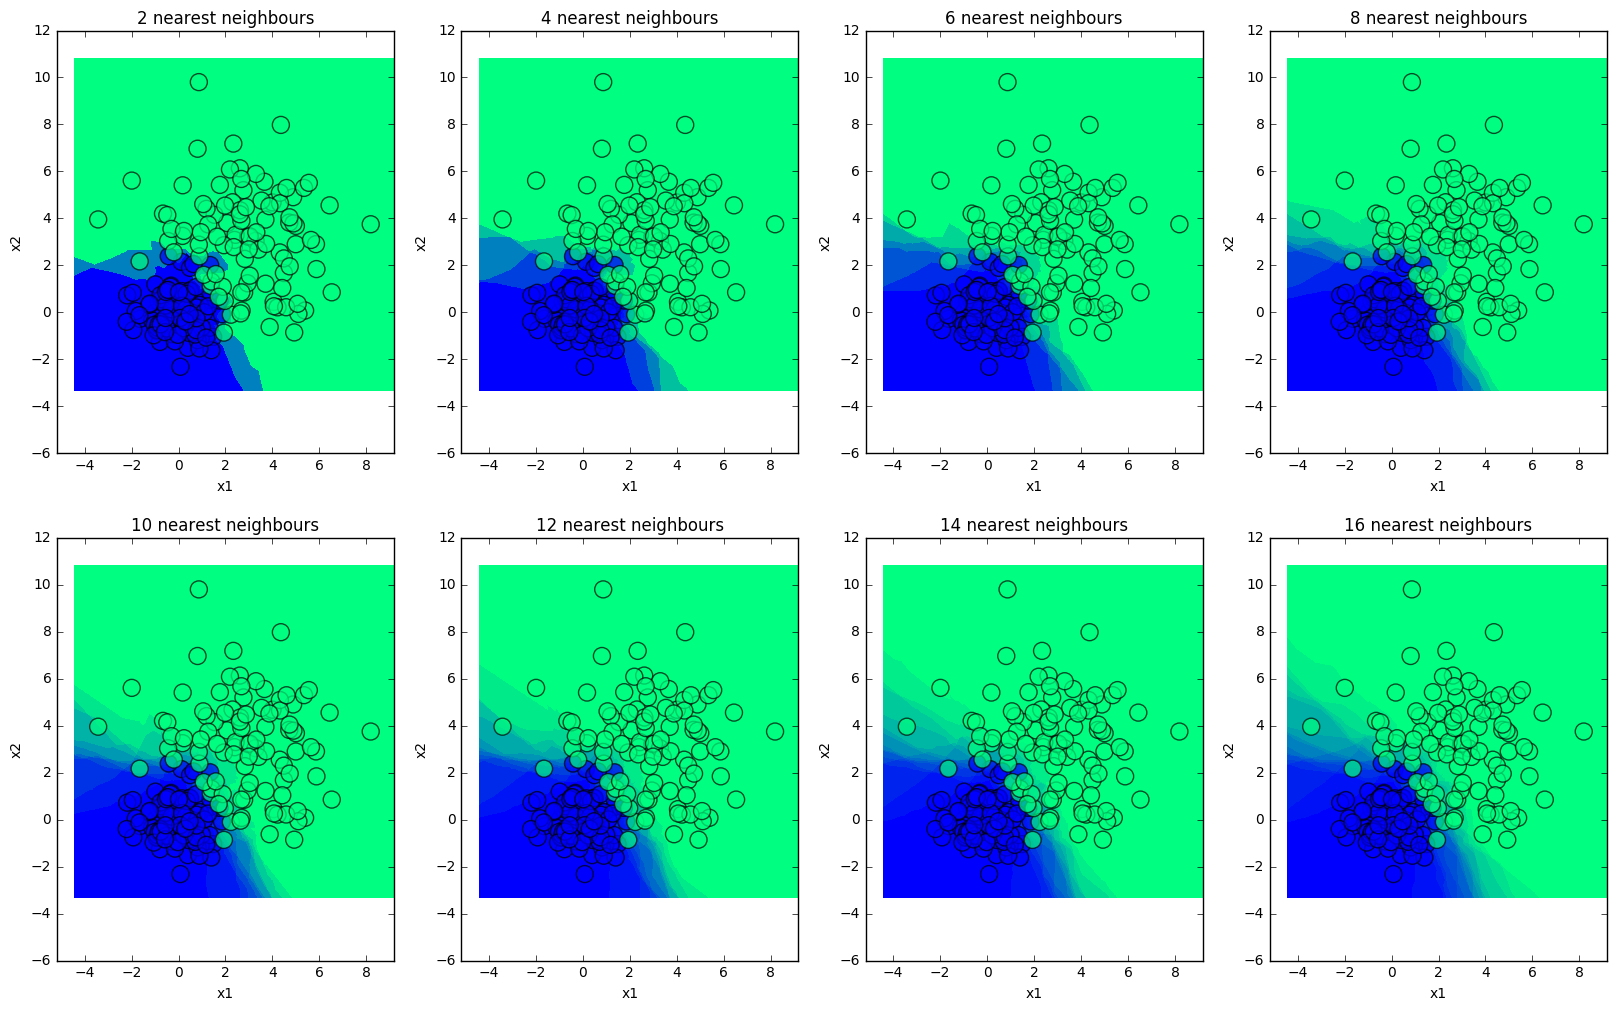

In [14]:
plt.figure(figsize=(20, 12))
for index, n_neighbors in enumerate(range(1,9)):
    print index+1,
    plt.subplot(2, 4, index + 1)
    plot_model(X, y, KNN(n_neighbors=2*n_neighbors))
    plt.title('{} nearest neighbours'.format(2*n_neighbors))

## Как выбрать число соседей?

### Оценка качества

Разобьём данные на 2 части - обучение и контроль

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(140L, 2L) (140L,)
(60L, 2L) (60L,)


Оценим качество работы для n_neighbors=3

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, KNN(n_neighbors=3).fit(X_train, y_train).predict(X_test))

0.93333333333333335

Оценим качество для каждого из значений n_neighbors из [1, n) и построим график зависимости качества от n_neighbors

In [19]:
n = 100
scores = []
for k in range(1, n):
    scores.append(accuracy_score(y_test, KNN(n_neighbors=k).fit(X_train, y_train).predict(X_test)))

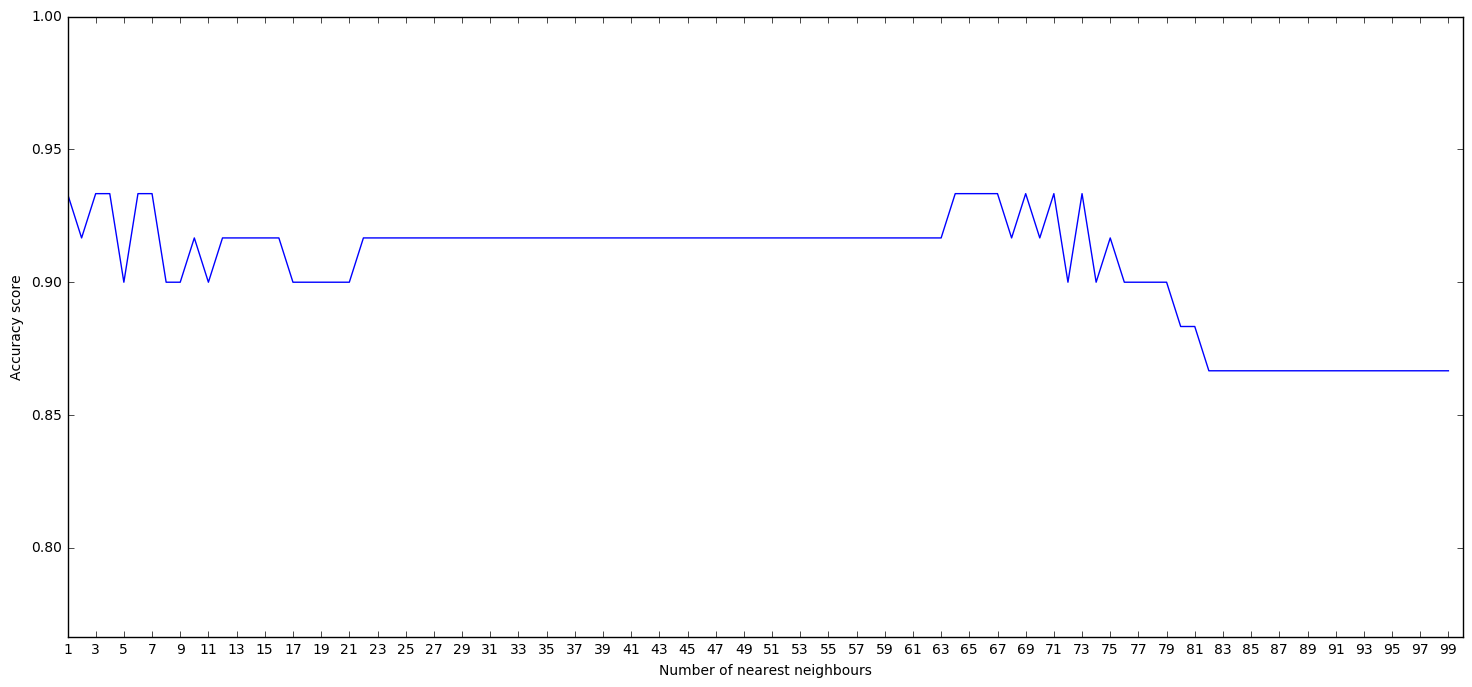

In [20]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, n), scores)
plt.xlim(1, n)
plt.ylim(np.min(scores) - 0.1, 1)
plt.xticks(np.arange(1, n, 2))
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')

Из-за небольшого количества данных в тесте график получается шумным и не до конца ясно, какое число соседей оптимально. Проведем кроссвалидацию уже готовыми библиотечными средствами

In [21]:
from sklearn.grid_search import GridSearchCV
params = {'n_neighbors': range(1, n)}
grid_searcher = GridSearchCV(clf, params, cv=5)
grid_searcher.fit(X, y)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

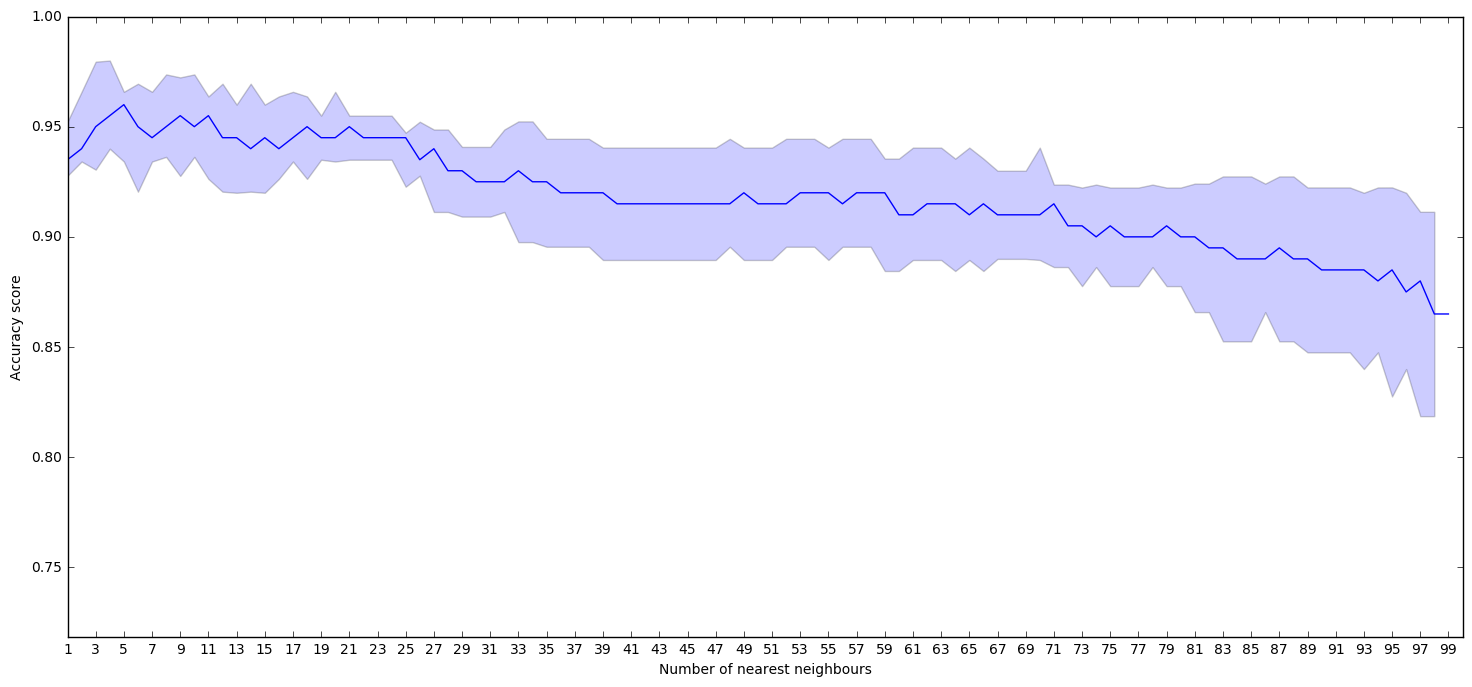

In [22]:
means = []
stds = []
for elem in grid_searcher.grid_scores_:
    means.append(np.mean(elem.cv_validation_scores))
    stds.append(np.sqrt(np.var(elem.cv_validation_scores)))

means = np.array(means)
stds = np.array(stds)

plt.figure(figsize=(18, 8))
plt.plot(range(1, n), means)
plt.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.2, facecolor='blue')
plt.xlim(1, n)
plt.ylim(np.min(means - stds) - 0.1, 1)
plt.xticks(np.arange(1, n, 2))
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')

## Задание. 
1) Сгенерируйте данные для трехклассовой классификации: по 100 точек каждого класса. Подберите оптимальное k для ваших данных по кросс-валидации.  

2) Обучите модель на всех данных для оптимального k на всех данных, предскажите ответы на этих же данных и выведите на экран ее качество (accuracy).

3) Выведите на экран среднее качество на кросс-валидации по трем фолдам.

4) В каком пункте (2 или 3) accuracy получилась больше? Почему? На какое из этих чисел нужно опираться, чтобы оценивать качество алгоритма?

In [1]:
#Your code here

## Какие параметры ещё можно настраивать?

Помимо числа соседей, мы можем подбирать следующие параметры:

1. weights ('uniform', 'distance', [callable])
2. algorithm ('auto', 'ball_tree', 'kd_tree', 'brute')
3. metric
4. Другие параметры: leaf_size (для BallTree и KDTree), p (для метрики Минковского), ...

## Что еще важно при использовании KNN?

Загрузим набор данных [Wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data), где требуется предсказать сорт винограда, из которого изготовлено вино, используя результаты химических анализов.

In [28]:
data = pd.read_csv('wine_data.csv', header=None)
print data.shape
data.head()

(178, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Сохраним отдельно матрицу объектов и столбец ответов

In [29]:
y = data[0].as_matrix()
X = data.drop(0, axis=1).as_matrix()
print X.shape, y.shape

(178L, 13L) (178L,)


Посмотрим, сколько сортов вин есть в данной выборке

In [30]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

Подберём число соседей по кроссвалидации, для этого напишем функцию, которая сделает это за нас

In [31]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

def cv_nn(n_neighbors, X, y):
    average_scores = []
    cv = KFold(X.shape[0], n_folds=5, shuffle=True, random_state=42)
    for k in n_neighbors:
        knn_clf = KNN(n_neighbors=k)
        scores = cross_val_score(knn_clf, X, y, cv=cv)
        average_scores.append(scores.mean())
    return average_scores

In [32]:
n_neighbors = xrange(1, 51)
average_scores = cv_nn(n_neighbors, X, y)

Посмотрим на то, что получилось:

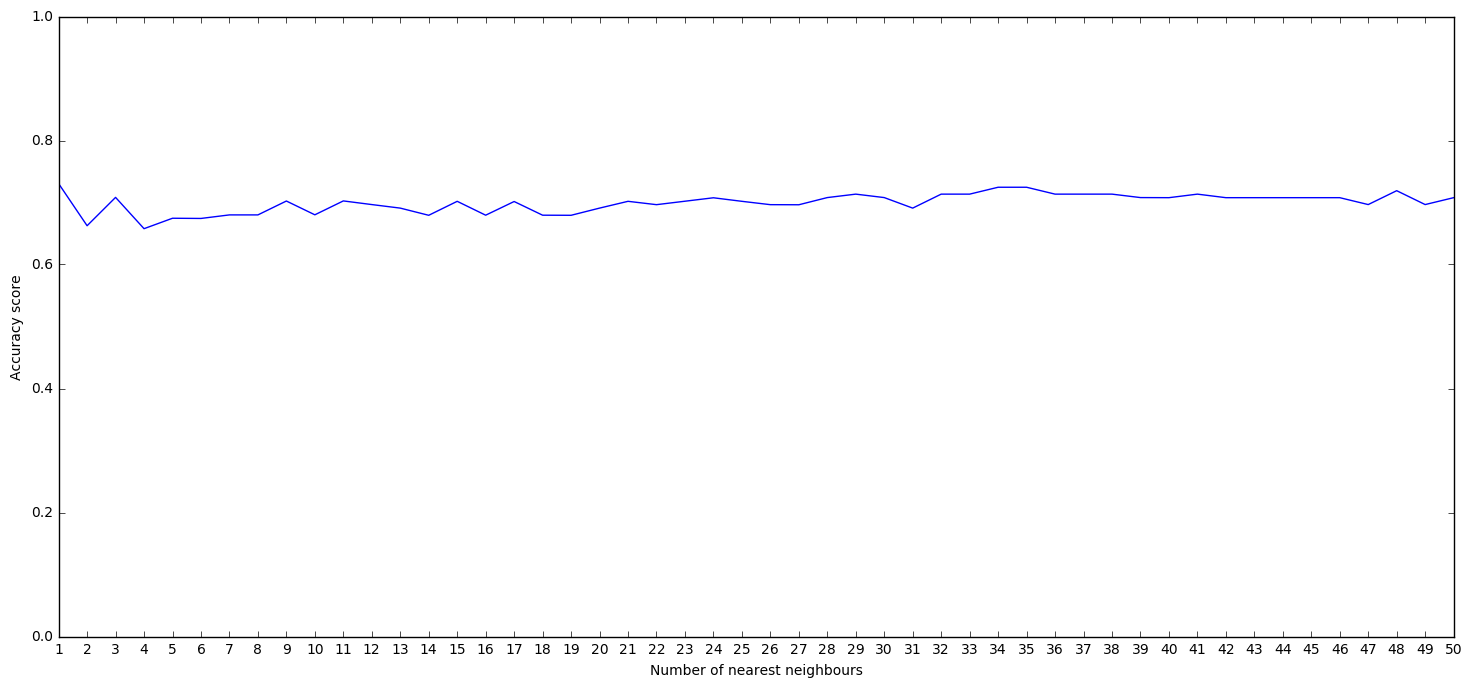

In [33]:
plt.figure(figsize=(18, 8))
l1 = plt.plot(n_neighbors, average_scores)
plt.xticks(n_neighbors)
plt.xlim(np.min(n_neighbors), np.max(n_neighbors))
plt.ylim(0, 1)
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')

А теперь сперва отмасштабируем данные и проделаем то же самое

In [34]:
from sklearn.preprocessing import scale
X_scaled = scale(X)
average_scores_scaled = cv_nn(n_neighbors, X_scaled, y)

Сравним полученные результаты

0.977619047619 28


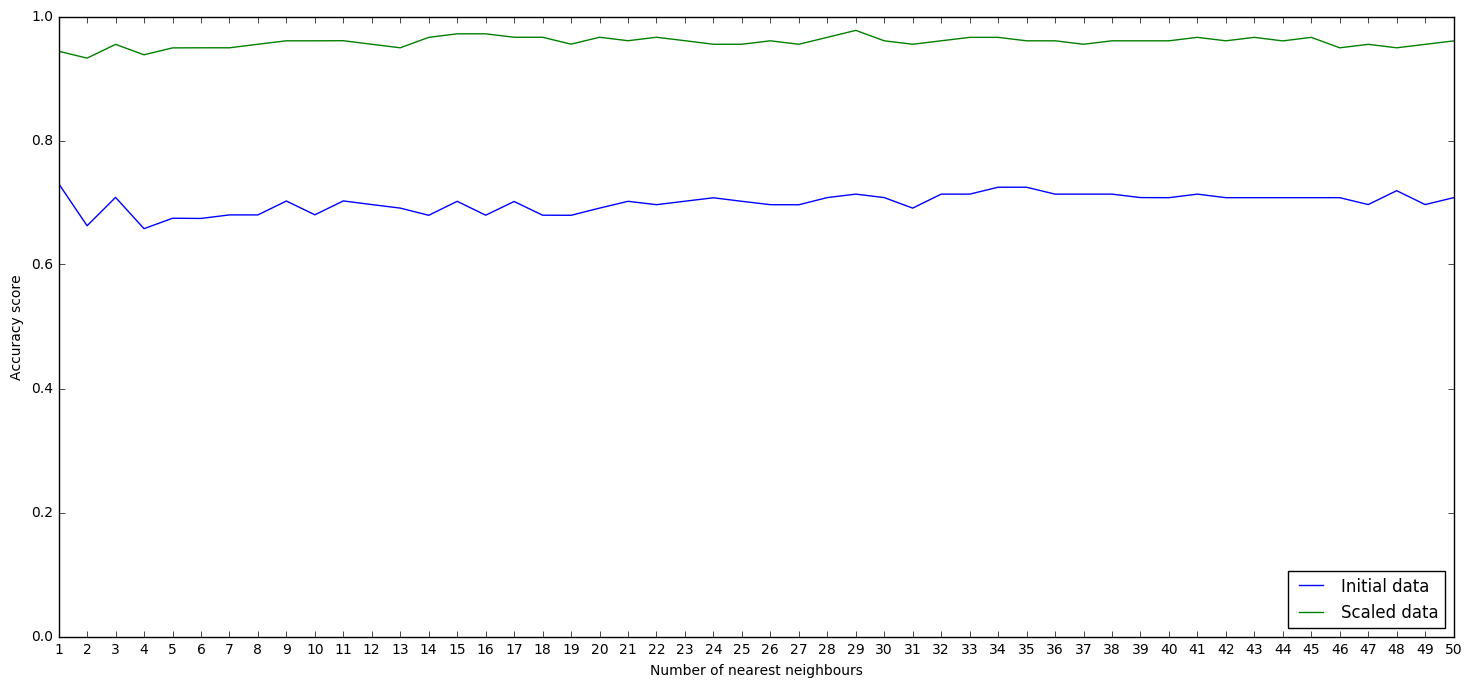

In [35]:
plt.figure(figsize=(18, 8))
l1 = plt.plot(n_neighbors, average_scores)
l2 = plt.plot(n_neighbors, average_scores_scaled)
plt.xticks(n_neighbors)
plt.xlim(np.min(n_neighbors), np.max(n_neighbors))
plt.ylim(0, 1)
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')
plt.legend(['Initial data', 'Scaled data'], loc='lower right')

print max(average_scores_scaled), average_scores_scaled.index(max(average_scores_scaled))

Видно, что масштабирование данных сильно сказалось на качестве классификации.

Сделаем финальное предсказание на всей выборке

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 12321)

def fit_predict(clf):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)

    return accuracy_score(y_test, pred)

print fit_predict(KNN(n_neighbors=28))

0.981481481481


## Логистическая регрессия и наивный байесовский классификатор

Посмотрим, как сработает наивный байесовский классификатор на данной задаче

In [37]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

print fit_predict(GaussianNB())
print fit_predict(BernoulliNB())

0.981481481481
0.944444444444


Теперь посмотрим, как себя покажет логистическая регрессия

In [38]:
from sklearn.linear_model import LogisticRegression

print fit_predict(LogisticRegression())

0.925925925926


## Задание.
Напишите функцию, аналогичную cv_nn, для подбора оптимального значения $C\in(0;1]$ в логистической регрессии. Сделайте предсказание для оптимального значения С. Сравните с только что полученным предсказанием для дефолтного значения параметра C=1.

In [2]:
#Your code here

## Сложный случай для метода ближайших соседей

In [41]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # первый признак пропорционален целевому
    x1 = 0.3 * y

    # остальные признаки – шум
    x_other = 10*np.random.random(size=[n_obj,n_feat-1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()

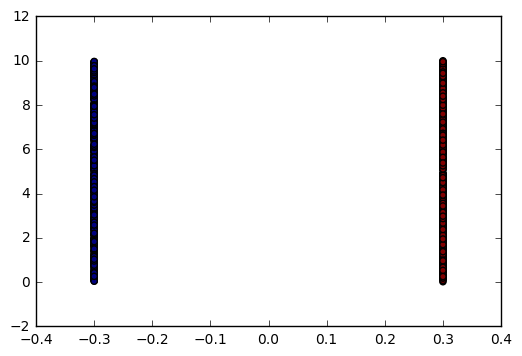

In [42]:
plt.scatter(X[:,0],X[:,1],c=y)

0.512 47


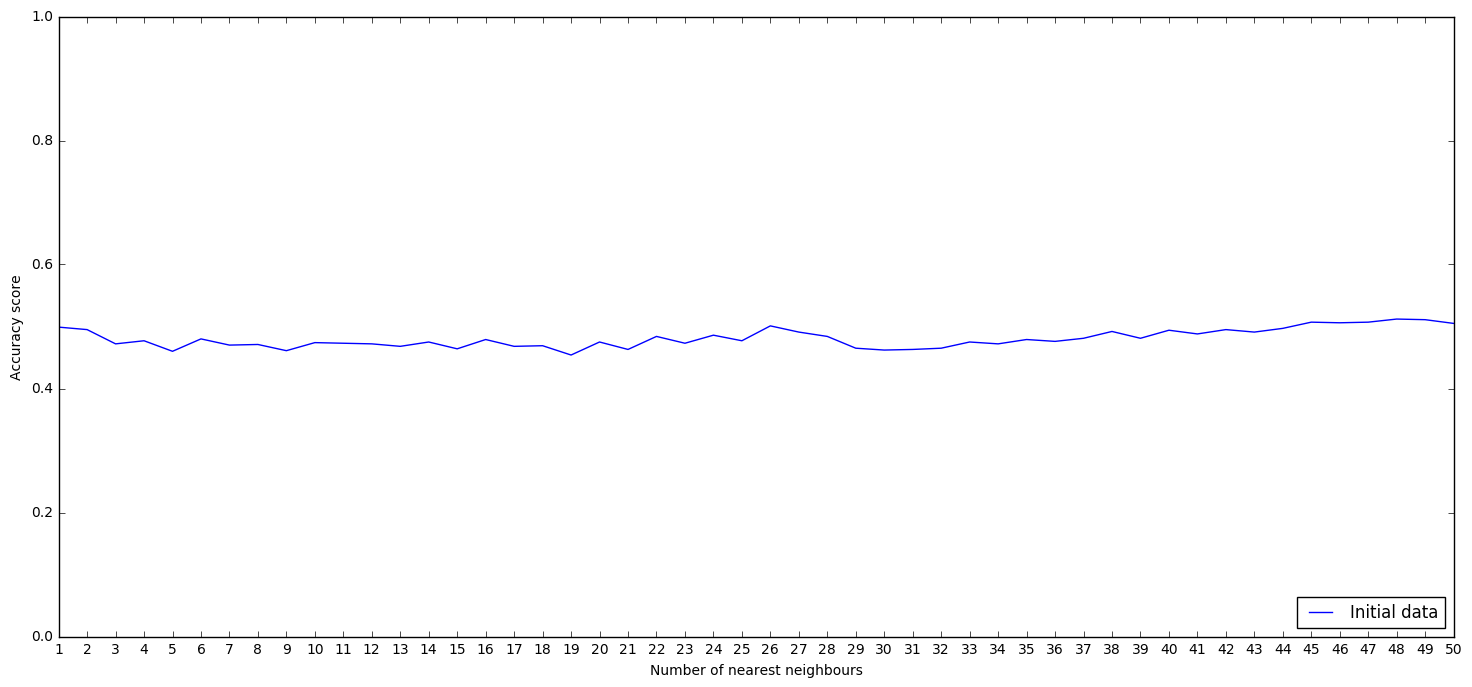

In [43]:
average_scores = cv_nn(n_neighbors, X, y)

plt.figure(figsize=(18, 8))
l1 = plt.plot(n_neighbors, average_scores)
plt.xticks(n_neighbors)
plt.xlim(np.min(n_neighbors), np.max(n_neighbors))
plt.ylim(0, 1)
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy score')
plt.legend(['Initial data', 'Scaled data'], loc='lower right')

print max(average_scores), average_scores.index(max(average_scores))

1.0 0.2


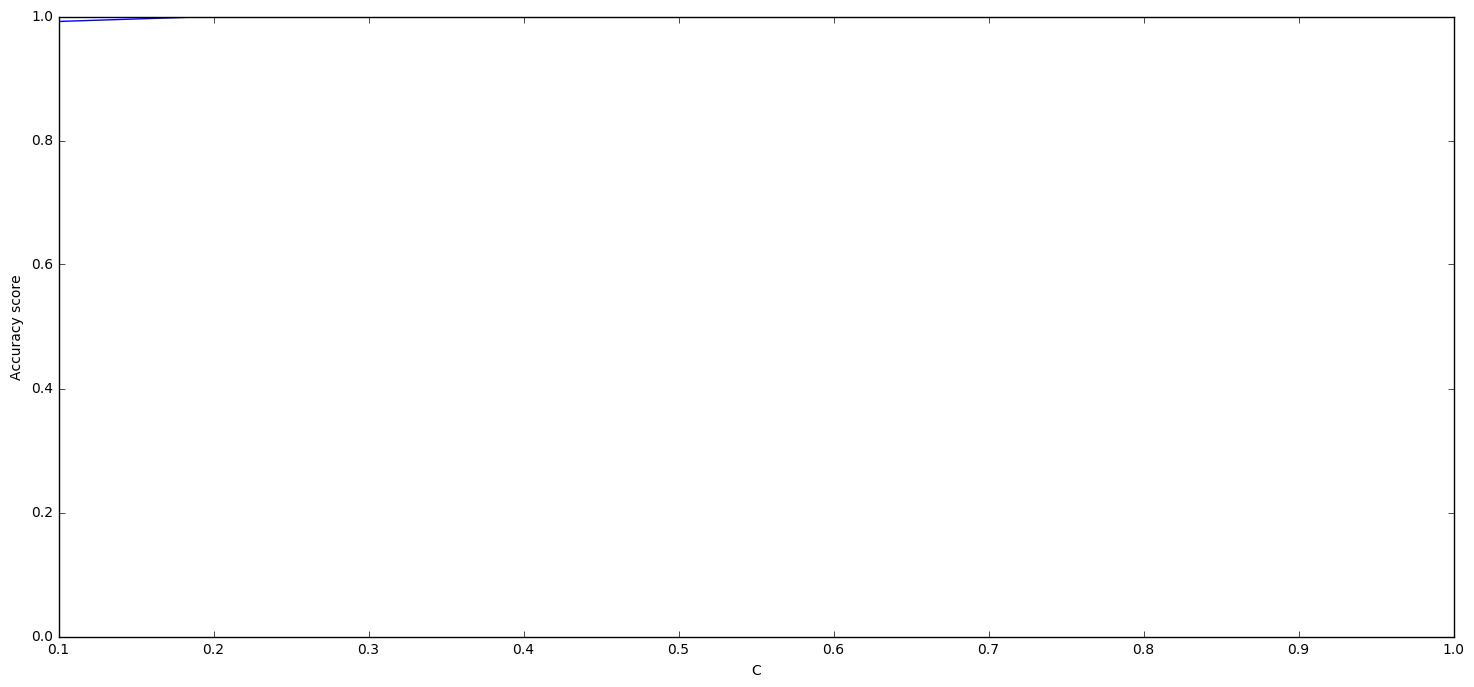

In [44]:
C_list = np.arange(0.1,1.1,0.1)
average_scores = cv_lr(C_list, X, y)

plt.figure(figsize=(18, 8))
l1 = plt.plot(C_list, average_scores)
plt.xticks(C_list)
plt.xlim(np.min(C_list), np.max(C_list))
plt.ylim(0, 1)
plt.xlabel('C')
plt.ylabel('Accuracy score')

print max(average_scores), C_list[average_scores.index(max(average_scores))]

## Задание.
Поработайте с датасетом "Ирисы". Обучите каждый из рассмотренных классификаторов на этом датасете и подберите для каждого классификатора наилучшие параметры. 

Какое наилучшее качество удалось получить? 

Какой классификатор лучше всего подходит для данной задачи? 

Сделайте масштабирование признаков. Изменилось ли после этого качество классификации?

Выведите на экран значение точности и полносты (precision, recall) для наилучшего классификатора (наибольшая accuracy).

[]

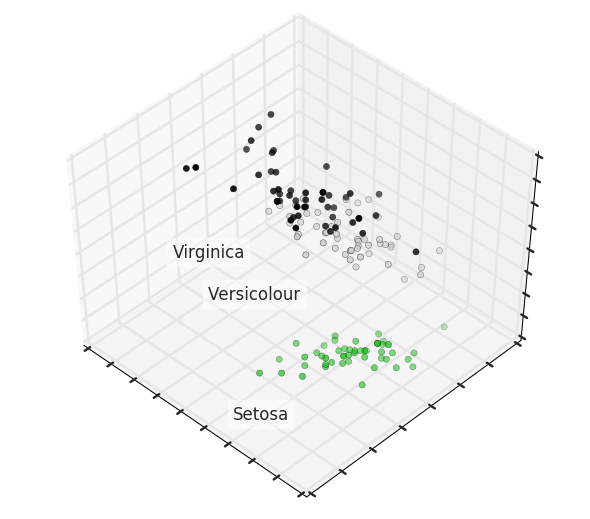

In [45]:
import seaborn as sns; sns.set(style='white')
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Загрузим наши ирисы
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Заведём красивую трёхмерную картинку
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [1]:
from sklearn.metrics import precision_score, recall_score

#Your code here